In [14]:
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784',version=1)
print(mnist_data.keys())

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [43]:
x = mnist_data['data']
y = mnist_data['target']

In [17]:
x.shape, y.shape

((70000, 784), (70000,))

In [20]:
sample = x.loc[[73]].to_numpy().reshape(28,28)

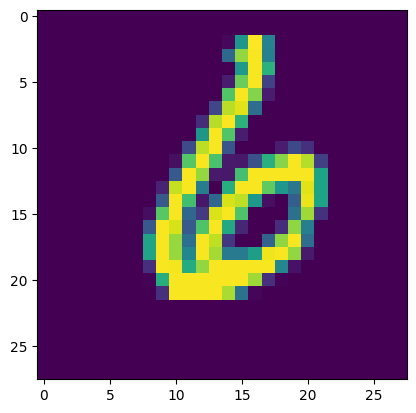

In [21]:
import matplotlib.pyplot as plt
plt.imshow(sample)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)
x_train.shape

(63000, 784)

In [31]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(random_state=42)
model.fit(x_train,y_train)

SGDClassifier(random_state=42)

In [33]:
y_predict = model.predict(x_test)

In [36]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy*100}")

Accuracy: 87.54285714285714


In [ ]:
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

In [ ]:
y_pred_cv = cross_val_predict(model, x, y, cv=5)
y_pred_cv

In [ ]:
report = classification_report(y_test, y_predict)
print(report)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

In [ ]:
import seaborn as sns
sns.heatmap(c, annot=True)